In [ ]:
# importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

Preprocessing steps.

In [ ]:
#reading the data
df= pd.read_csv('/content/waterQuality1.csv')
df.head()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
df['ammonia'].values

array(['9.08', '21.16', '14.02', ..., '6.85', '10', '6.85'], dtype=object)

In [ ]:
# Identify and count #NUM! values in the target column
num_errors = df['ammonia'].str.contains('#NUM!', na=False).sum()
print(f"Number of #NUM! values in target: {num_errors}")

Number of #NUM! values in target: 3


In [ ]:
# Replace #NUM! with NaN
df['ammonia'] = df['ammonia'].replace('#NUM!', np.nan)
df['ammonia'].value_counts()

ammonia
0.12     13
0.17     13
0.37     13
13.74    12
0.41     11
         ..
6.78      1
16.4      1
24.46     1
20.49     1
10        1
Name: count, Length: 2563, dtype: int64

In [ ]:

df['ammonia']=pd.to_numeric(df['ammonia'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns


In [ ]:
# Impute missing values with the mean
mean=df['ammonia'].mean()
print(mean)
df['ammonia'].fillna(df['ammonia'].mean(), inplace=True)
df['ammonia'].value_counts()

14.2782116058029


ammonia
0.17     13
0.12     13
0.37     13
13.74    12
0.75     11
         ..
22.37     1
6.78      1
16.40     1
24.46     1
10.00     1
Name: count, Length: 2564, dtype: int64

In [ ]:
df['ammonia'].value_counts()


ammonia
0.17     13
0.12     13
0.37     13
13.74    12
0.75     11
         ..
22.37     1
6.78      1
16.40     1
24.46     1
10.00     1
Name: count, Length: 2564, dtype: int64

In [ ]:
df['ammonia'].dtypes

dtype('float64')

In [ ]:
# Check unique values and their data types in the target column
print(df['is_safe'].unique())
print(df['is_safe'].apply(type).value_counts())



['1' '0' '#NUM!']
is_safe
<class 'str'>    7999
Name: count, dtype: int64


We can see that there are three types of data in the target column. thus to ensure a single datatype following the below process

In [ ]:
# Replace #NUM! with NaN
df['is_safe'] = df['is_safe'].replace('#NUM!', np.nan)
df['is_safe'].value_counts()

is_safe
0    7084
1     912
Name: count, dtype: int64

In [ ]:
# Count the number of NaN values in the target column
print(df['is_safe'].isnull().sum())

3


In [ ]:
# Drop rows with NaN values in the target column
df_cleaned = df.dropna()
df_cleaned =df_cleaned.astype({'is_safe': 'float'})
df_cleaned.shape

(7996, 21)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [ ]:
df_cleaned = df_cleaned.astype(int)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   aluminium    7996 non-null   int64
 1   ammonia      7996 non-null   int64
 2   arsenic      7996 non-null   int64
 3   barium       7996 non-null   int64
 4   cadmium      7996 non-null   int64
 5   chloramine   7996 non-null   int64
 6   chromium     7996 non-null   int64
 7   copper       7996 non-null   int64
 8   flouride     7996 non-null   int64
 9   bacteria     7996 non-null   int64
 10  viruses      7996 non-null   int64
 11  lead         7996 non-null   int64
 12  nitrates     7996 non-null   int64
 13  nitrites     7996 non-null   int64
 14  mercury      7996 non-null   int64
 15  perchlorate  7996 non-null   int64
 16  radium       7996 non-null   int64
 17  selenium     7996 non-null   int64
 18  silver       7996 non-null   int64
 19  uranium      7996 non-null   int64
 20  is_safe      

In [ ]:
# Encoding the Target Variable.
label_encoder = preprocessing.LabelEncoder()
df['is safe']= label_encoder.fit_transform(df['is_safe'])
df['is_safe'].value_counts()


is_safe
0    7084
1     912
Name: count, dtype: int64

<Axes: >

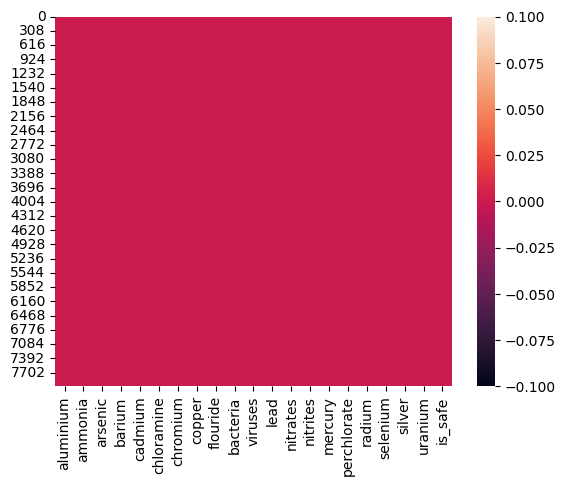

In [ ]:
sns.heatmap(df_cleaned.isnull())

In [ ]:
# Prescaling the dataset
from sklearn.preprocessing import StandardScaler
scaling      = StandardScaler()
scaled_input = scaling.fit_transform(df)

scaled_input

array([[ 0.77769984, -0.58560116, -0.48082883, ..., -0.91713868,
         2.78703137,  2.76712378],
       [ 1.30731642,  0.77526341, -0.59960559, ...,  0.19801013,
         2.78703137,  2.76712378],
       [ 0.27179743, -0.02908866, -0.48082883, ..., -1.28885494,
        -0.35880472, -0.35873741],
       ...,
       [-0.45543727, -0.83682036, -0.63919784, ...,  0.19801013,
         2.78703137,  2.76712378],
       [-0.51867507, -0.48195916, -0.59960559, ..., -1.66057121,
         2.78703137,  2.76712378],
       [-0.4949609 , -0.83682036, -0.59960559, ...,  0.19801013,
         2.78703137,  2.76712378]])

In [ ]:
# defining the x and y data set
x=df_cleaned.iloc[:,:-1]
y=df_cleaned['is_safe']

In [ ]:
x.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1,9,0,2,0,0,0,0,0,0,0,0,16,1,0,37,6,0,0,0
1,2,21,0,3,0,5,0,0,0,0,0,0,2,1,0,32,3,0,0,0
2,1,14,0,0,0,4,0,0,0,0,0,0,14,1,0,50,7,0,0,0
3,1,11,0,2,0,7,0,1,1,0,0,0,1,1,0,9,1,0,0,0
4,0,24,0,0,0,2,0,0,0,0,0,0,6,1,0,16,2,0,0,0


In [ ]:
y

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7996, dtype: int64

In [ ]:
y.value_counts()

is_safe
0    7084
1     912
Name: count, dtype: int64

In [ ]:
#Splitting the dataset in train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [ ]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((6396, 20), (6396,), (1600, 20), (1600,))

# Loading Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_Model = RandomForestClassifier()

In [ ]:
# Fitting the Model
Random_Forest_Model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#predicting the result
pred_rf = Random_Forest_Model.predict(x_test)

In [ ]:
pd.Series(pred_rf).value_counts() # getting the count of each category
pred_rf

array([0, 0, 0, ..., 0, 0, 0])

#Evaluating the performance of the model

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy_Score:",np.round(accuracy_score(y_test,pred_rf),2)*100,"%")

Accuracy_Score: 88.0 %


In [ ]:
precision_score= precision_score(y_test, pred_rf)
recall_score = recall_score(y_test, pred_rf)
f1_score = f1_score(y_test, pred_rf)
confusion_matrix = confusion_matrix(y_test, pred_rf)
classification_report = classification_report(y_test, pred_rf)
print(f'confusion matrix: {confusion_matrix}')
print(f'Precision: {precision_score}')
print(f'Recall: {recall_score}')
print(f'F1 Score: {f1_score}')

print(f'Classification Report: {classification_report}')

confusion matrix: [[1365   49]
 [ 148   38]]
Precision: 0.4367816091954023
Recall: 0.20430107526881722
F1 Score: 0.2783882783882784
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1414
           1       0.44      0.20      0.28       186

    accuracy                           0.88      1600
   macro avg       0.67      0.58      0.61      1600
weighted avg       0.85      0.88      0.86      1600



# Predicting the values for a single input

In [ ]:
x_test.values[25].shape

(20,)

In [ ]:
x_test.values[25].reshape(1,20).shape# reshaping is very important.

(1, 20)

In [ ]:
print("ACTUAL OUTPUT    : ",y_test.values[25])# for predicting the single dat result both x and y have to be in array form
print("PREDICTED OUTPUT : ",Random_Forest_Model.predict(x_test.values[20].reshape(1,20))[0])

ACTUAL OUTPUT    :  0
PREDICTED OUTPUT :  0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Finding best hyper parameters for tuning the model and evaluating

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [ ]:
# Defining the parameter grid to search
param_grid = {'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'criterion': ['gini', 'entropy'],          # Criterion for splitting
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}


In [ ]:

# Performing Gridsearch_CV
grid_search = GridSearchCV(estimator=Random_Forest_Model, param_grid=param_grid, cv=5, n_jobs=-1,verbose=1,scoring='accuracy')


In [ ]:
#fitting the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
#Performing Crossvalidation with outer loop
#nested_scores = cross_val_score(grid_search, x_train, y_train, cv=5,n_jobs=-1,verbose=1, scoring='accuracy')

In [ ]:
# getting the best parameters
print(f'Best Score: {grid_search.best_score_}')
print('Best Parameters:,grid_search.best_params')

Best Score: 0.9011887949569977
Best Parameters:,grid_search.best_params
